In [ ]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/drugs.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
# Mengetahui jumlah dataset menggunakan shape
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 53766 baris, 7 kolom


In [ ]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")


Jumlah baris duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [ ]:
text = df[['review']]
text

,review
0,"""I&#039;ve tried a few antidepressants over th..."
1,"""My son has Crohn&#039;s disease and has done ..."
2,"""Quick reduction of symptoms"""
3,"""Contrave combines drugs that were used for al..."
4,"""I have been on this birth control for one cyc..."
...,...
53761,"""I have taken Tamoxifen for 5 years. Side effe..."
53762,"""I&#039;ve been taking Lexapro (escitaploprgra..."
53763,"""I&#039;m married, 34 years old and I have no ..."
53764,"""I was prescribed Nucynta for severe neck/shou..."


In [ ]:
!pip install emoji
import emoji

import re

def cleanTweets(text):
    text = re.sub('@\w+', '', text)                                # Menghapus Username
    text = re.sub('https?:\/\/\S+', '', text)                       # Menghapus Link
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())      # Lower Case setiap kata
    text = re.sub('#','',text)                                      # Hanya menghapus simbol hastag
    text = re.sub('\d+', '', text)                                  # Menghapus angka
    text = re.sub('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]+','', text)  # Menghapus simbol-simbol beserta string selanjutnya
    text = re.sub('RT[\s]+','',text)                                # Menghapus kata yang memiliki "retweet / RT"
    text = re.sub('\n',' ',text)                                    # Menghapus newline
    text = emoji.replace_emoji(text, replace='')                    # Menghapus emoji atau emoticon
    return text

# Assuming df is your dataframe and 'Text Tweet' is the column to be cleaned
df.loc[:, 'review'] = df['review'].apply(cleanTweets)

df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4
5,208087,Zyclara,Keratosis,days in on first weeks using on arms an...,4,3-Jul-14,13
6,215892,Copper,Birth Control,i ve had the copper coil for about mon...,6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,this has been great for me i ve been on...,9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,ive been on methadone for over ten years and ...,7,18-Oct-16,21
9,71428,Levora,Birth Control,i was on this pill for almost two years it d...,2,16-Apr-11,3


In [ ]:
# Menentukan kategori risiko berdasarkan rating saja
def determine_risk(rating): # Changed 'row' to 'rating'
    if rating <= 3:
        return 'High Risk'
    elif 4 <= rating <= 7:
        return 'Moderate Risk'
    elif rating >= 8:
        return 'Low Risk'

# Menambahkan kolom baru 'category_risk' berdasarkan rating
df['category_risk'] = df['rating'].apply(determine_risk) # Applying to the 'rating' column

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,category_risk
0,163740,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22,Low Risk
1,206473,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17,Low Risk
2,159672,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,39293,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35,Low Risk
4,97768,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effe...,10,13-Sep-14,43,Low Risk
53762,140714,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgra...,9,8-Oct-16,11,Low Risk
53763,130945,Levonorgestrel,Birth Control,i m married years old and i have no ...,8,15-Nov-10,7,Low Risk
53764,47656,Tapentadol,Pain,i was prescribed nucynta for severe neck shou...,1,28-Nov-11,20,High Risk


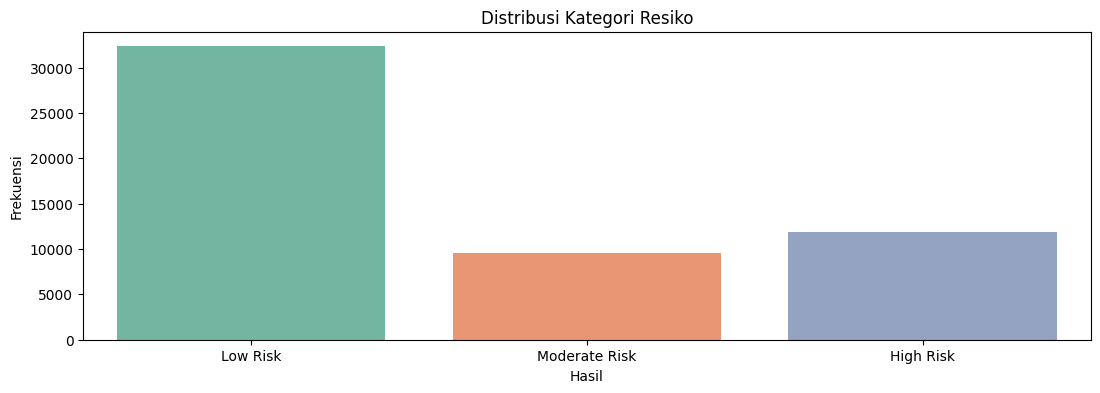

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label y dengan hue dan palette
plt.figure(figsize=(13,4))
sns.countplot(x='category_risk', data=df, hue='category_risk', palette='Set2', legend=False)
plt.title('Distribusi Kategori Resiko')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
# prompt: hapus kolom uniqueid

df = df.drop('uniqueID', axis=1)
df

,drugName,condition,review,rating,date,usefulCount,category_risk
0,Mirtazapine,Depression,i ve tried a few antidepressants over th...,10,28-Feb-12,22,Low Risk
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done ...,8,17-May-09,17,Low Risk
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,Contrave,Weight Loss,contrave combines drugs that were used for al...,9,5-Mar-17,35,Low Risk
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cyc...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effe...,10,13-Sep-14,43,Low Risk
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgra...,9,8-Oct-16,11,Low Risk
53763,Levonorgestrel,Birth Control,i m married years old and i have no ...,8,15-Nov-10,7,Low Risk
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shou...,1,28-Nov-11,20,High Risk


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Assuming 'df' is your DataFrame and 'Normalized Tweet' is the column containing your text
# Create a list of Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Function to remove stopwords from a text
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in indonesian_stopwords]
  return ' '.join(filtered_words)

# Apply the function to your DataFrame
df.loc[:, 'review'] = df['review'].apply(remove_stopwords)
df

,drugName,condition,review,rating,date,usefulCount,category_risk
0,Mirtazapine,Depression,i ve tried a few antidepressants over the year...,10,28-Feb-12,22,Low Risk
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done very w...,8,17-May-09,17,Low Risk
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,Low Risk
3,Contrave,Weight Loss,contrave combines drugs that were used for alc...,9,5-Mar-17,35,Low Risk
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cycl...,9,22-Oct-15,4,Low Risk
...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects ...,10,13-Sep-14,43,Low Risk
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgram since...,9,8-Oct-16,11,Low Risk
53763,Levonorgestrel,Birth Control,i m married years old and i have no kids takin...,8,15-Nov-10,7,Low Risk
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shoul...,1,28-Nov-11,20,High Risk


In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['review'].apply(tokenize)
df['tokenize']

,tokenize
0,"[i, ve, tried, a, few, antidepressants, over, ..."
1,"[my, son, has, crohn, s, disease, and, has, do..."
2,"[quick, reduction, of, symptoms]"
3,"[contrave, combines, drugs, that, were, used, ..."
4,"[i, have, been, on, this, birth, control, for,..."
...,...
53761,"[i, have, taken, tamoxifen, for, years, side, ..."
53762,"[i, ve, been, taking, lexapro, escitaploprgram..."
53763,"[i, m, married, years, old, and, i, have, no, ..."
53764,"[i, was, prescribed, nucynta, for, severe, nec..."


In [ ]:
# prompt: encoding category_risk

# Encoding the 'category_risk' column using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_risk'] = le.fit_transform(df['category_risk'])
df

,drugName,condition,review,rating,date,usefulCount,category_risk,tokenize
0,Mirtazapine,Depression,i ve tried a few antidepressants over the year...,10,28-Feb-12,22,1,"[i, ve, tried, a, few, antidepressants, over, ..."
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohn s disease and has done very w...,8,17-May-09,17,1,"[my, son, has, crohn, s, disease, and, has, do..."
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,29-Sep-17,3,1,"[quick, reduction, of, symptoms]"
3,Contrave,Weight Loss,contrave combines drugs that were used for alc...,9,5-Mar-17,35,1,"[contrave, combines, drugs, that, were, used, ..."
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cycl...,9,22-Oct-15,4,1,"[i, have, been, on, this, birth, control, for,..."
...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects ...,10,13-Sep-14,43,1,"[i, have, taken, tamoxifen, for, years, side, ..."
53762,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgram since...,9,8-Oct-16,11,1,"[i, ve, been, taking, lexapro, escitaploprgram..."
53763,Levonorgestrel,Birth Control,i m married years old and i have no kids takin...,8,15-Nov-10,7,1,"[i, m, married, years, old, and, i, have, no, ..."
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shoul...,1,28-Nov-11,20,0,"[i, was, prescribed, nucynta, for, severe, nec..."


In [ ]:
from collections import Counter # Import the Counter class from the collections module

from sklearn.model_selection import train_test_split

texts = df['review'].values
labels = df['category_risk']
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)
print("Train label distribution:", Counter(train_labels)) # Now Counter is defined and can be used
print("Test label distribution:", Counter(test_labels))

Train label distribution: Counter({1: 25879, 0: 9470, 2: 7663})
Test label distribution: Counter({1: 6470, 0: 2368, 2: 1916})


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Convert train_texts and test_texts to lists of strings
train_texts = [str(text) for text in train_texts] # Convert each element of train_texts to a string
test_texts = [str(text) for text in test_texts] # Convert each element of test_texts to a string
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=50)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=50)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

In [ ]:
from transformers import TFAutoModelForSequenceClassification, BertTokenizer, AutoTokenizer

model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])
history = model.fit(train_dataset.shuffle(100).batch(16), epochs=10, batch_size=16) # Assign the return value of model.fit to history

Epoch 1/10
2689/2689 [==============================] - 534s 183ms/step - loss: 0.7033 - accuracy: 0.7065
Epoch 2/10
2689/2689 [==============================] - 494s 184ms/step - loss: 0.5493 - accuracy: 0.7775
Epoch 3/10
2689/2689 [==============================] - 494s 184ms/step - loss: 0.4304 - accuracy: 0.8315
Epoch 4/10
2689/2689 [==============================] - 495s 184ms/step - loss: 0.3231 - accuracy: 0.8779
Epoch 5/10
2689/2689 [==============================] - 492s 183ms/step - loss: 0.2341 - accuracy: 0.9151
Epoch 6/10
2689/2689 [==============================] - 493s 183ms/step - loss: 0.1714 - accuracy: 0.9389
Epoch 7/10
2689/2689 [==============================] - 491s 183ms/step - loss: 0.1327 - accuracy: 0.9532
Epoch 8/10
2689/2689 [==============================] - 490s 182ms/step - loss: 0.1010 - accuracy: 0.9650
Epoch 9/10
2689/2689 [==============================] - 490s 182ms/step - loss: 0.0877 - accuracy: 0.9699
Epoch 10/10
2689/2689 [=======================

In [ ]:
loss, accuracy = model.evaluate(test_dataset.batch(16))
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

673/673 [==============================] - 58s 72ms/step - loss: 1.1574 - accuracy: 0.7697
Test Loss: 1.1573690176010132, Test Accuracy: 0.7696670889854431


In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_classes = tf.argmax(predictions.logits, axis=1)

673/673 [==============================] - 50s 66ms/step


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Low risk', 'Moderate risk', 'High risk']
print(classification_report(test_labels, predicted_classes, target_names=target_names))

               precision    recall  f1-score   support

     Low risk       0.78      0.66      0.72      2368
Moderate risk       0.83      0.90      0.86      6470
    High risk       0.51      0.47      0.49      1916

     accuracy                           0.77     10754
    macro avg       0.71      0.68      0.69     10754
 weighted avg       0.76      0.77      0.76     10754



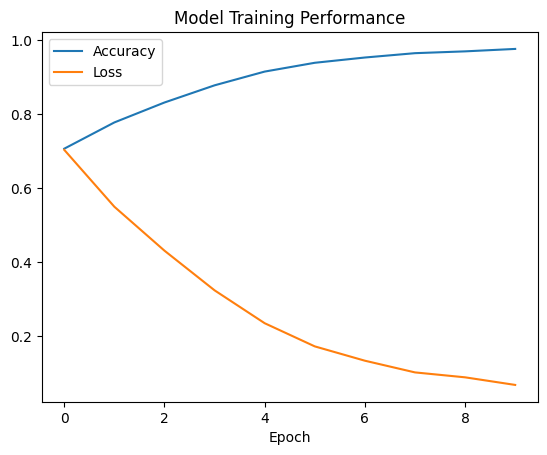

Validation data is not available in history.


In [ ]:
import matplotlib.pyplot as plt

# Plot Training Accuracy dan Training Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Performance')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

# Plot Validation Accuracy dan Validation Loss (jika tersedia)
if 'val_accuracy' in history.history and 'val_loss' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Validation Performance')
    plt.xlabel('Epoch')
    plt.legend(['Accuracy', 'Loss'], loc='upper left')
    plt.show()
else:
    print("Validation data is not available in history.")


               precision    recall  f1-score   support

     Low risk       0.78      0.66      0.72      2368
Moderate risk       0.83      0.90      0.86      6470
    High risk       0.51      0.47      0.49      1916

     accuracy                           0.77     10754
    macro avg       0.71      0.68      0.69     10754
 weighted avg       0.76      0.77      0.76     10754



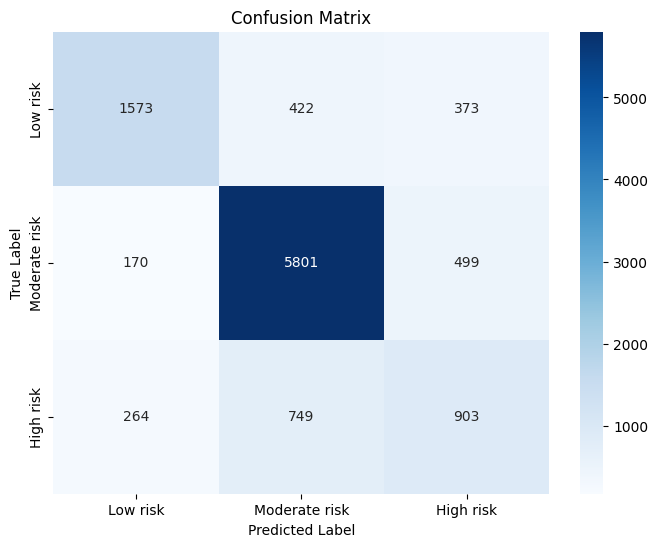

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Classification Report
print(classification_report(test_labels, predicted_classes, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
